<a href="https://colab.research.google.com/github/Megu2024/Project/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


860/860 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.6669 - loss: 0.9832 - val_accuracy: 0.8432 - val_loss: 0.4160 - learning_rate: 0.0010
Epoch 2/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.8100 - loss: 0.5090 - val_accuracy: 0.8790 - val_loss: 0.3281 - learning_rate: 0.0010
Epoch 3/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.8339 - loss: 0.4487 - val_accuracy: 0.8870 - val_loss: 0.3098 - learning_rate: 0.0010
Epoch 4/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8535 - loss: 0.4006 - val_accuracy: 0.9026 - val_loss: 0.2678 - learning_rate: 0.0010
Epoch 5/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.8646 - loss: 0.3730 - val_accuracy: 0.8932 - val_loss: 0.2768 - learning_rate: 0.0010
Epoch 6/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.8673 - loss: 0.3629 - val_accuracy: 0.8962 - val_loss: 0.2656 - learning_rate: 0.0010
Epoch 7/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8778 - loss: 0.3394

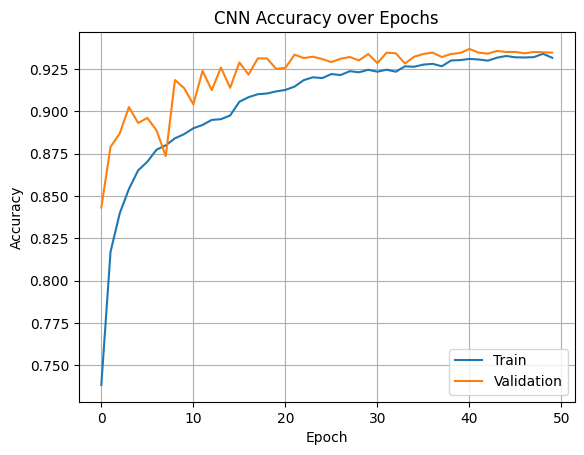

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_val, y_val = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[5000:], y_train[5000:]
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1)
datagen.fit(x_train)
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-5)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_val, y_val),
                    epochs=50,
                    callbacks=[early_stop, reduce_lr])

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("CNN Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
